# Liver Disease


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [48]:
df = pd.read_csv('liver.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [50]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [53]:
df.Dataset.value_counts(normalize=True)

Dataset
1    0.715026
2    0.284974
Name: proportion, dtype: float64

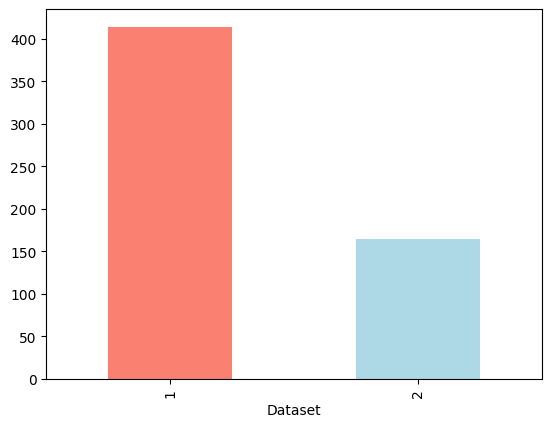

In [54]:
df.Dataset.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

**Checking the distribution**

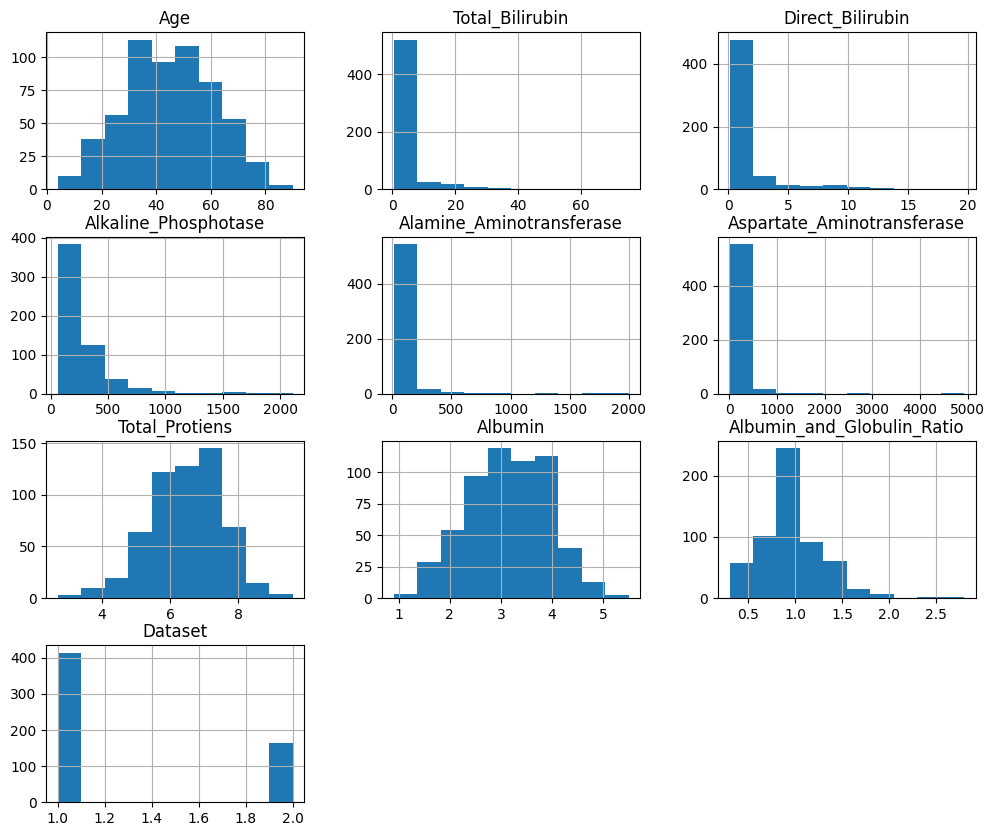

In [55]:
df.hist(figsize=(12,10));

**Checking the outlier**

In [56]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


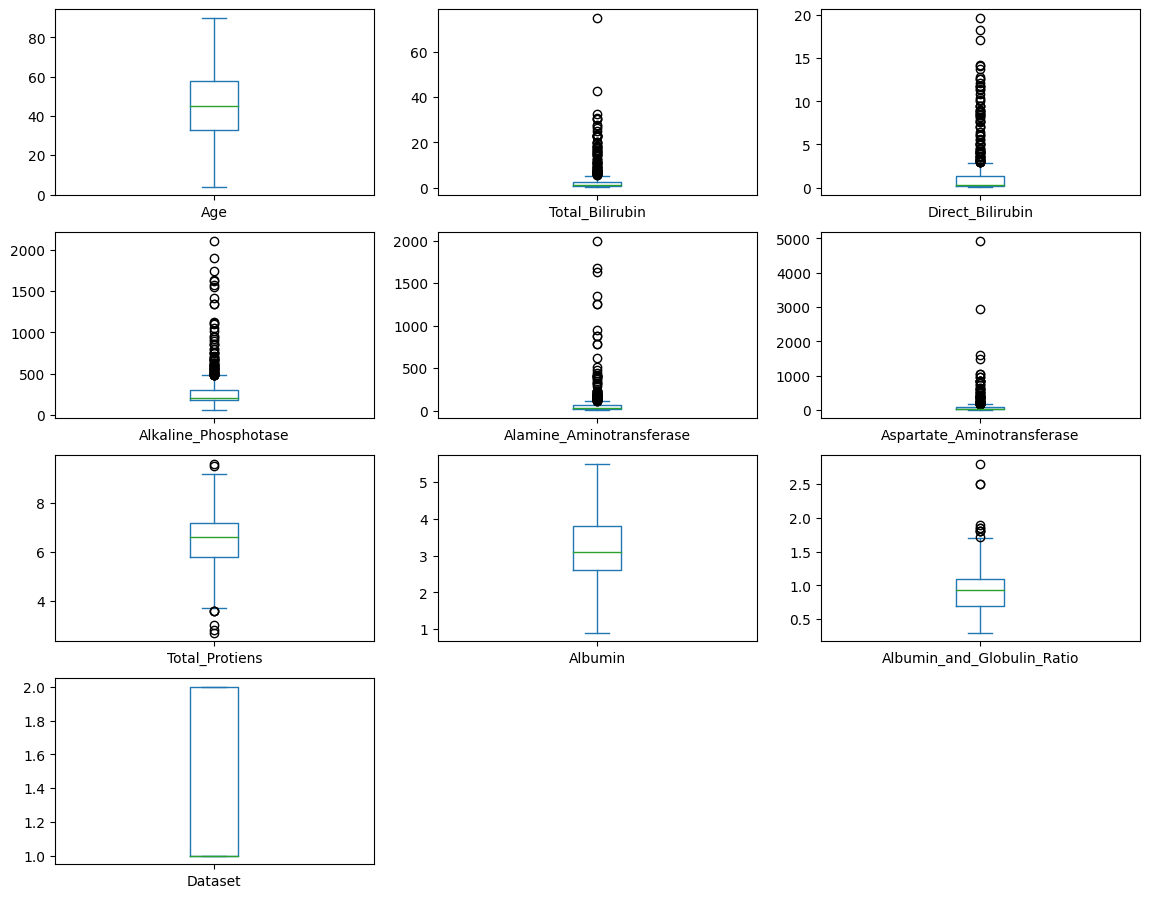

In [57]:
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False,sharey=False ,figsize =(14,14));

<Axes: >

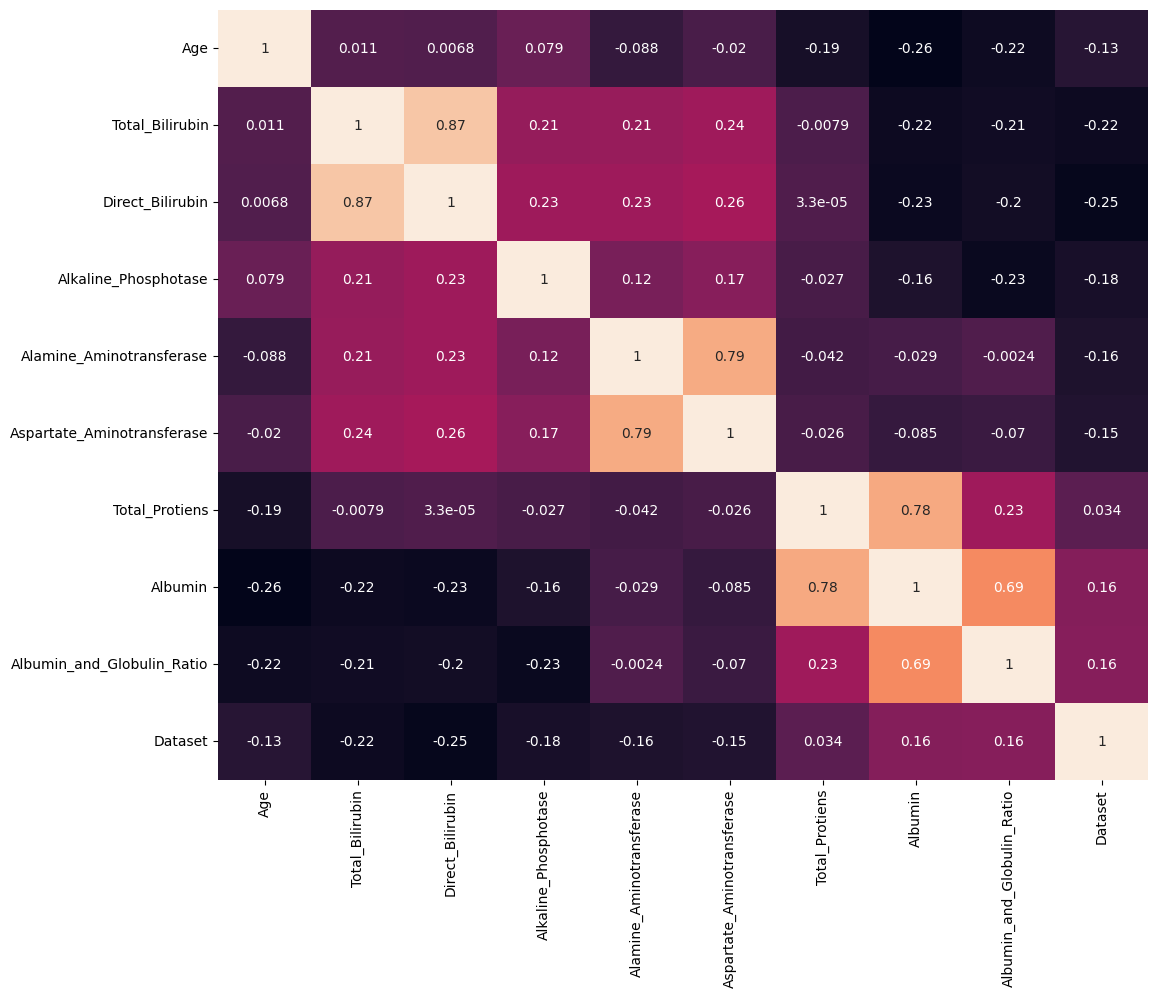

In [58]:
# Option 1: Remove non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cbar=False)





In [60]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [61]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [62]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(['Dataset'], axis=1)
y = df['Dataset']

print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 414, 2: 165})


In [63]:
os =  RandomOverSampler()
X, y = os.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y))

Resampled dataset shape Counter({1: 414, 2: 414})


In [64]:
df = X
df['Dataset'] = y
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         828 non-null    int64  
 1   Gender                      828 non-null    int64  
 2   Total_Bilirubin             828 non-null    float64
 3   Direct_Bilirubin            828 non-null    float64
 4   Alkaline_Phosphotase        828 non-null    int64  
 5   Alamine_Aminotransferase    828 non-null    int64  
 6   Aspartate_Aminotransferase  828 non-null    int64  
 7   Total_Protiens              828 non-null    float64
 8   Albumin                     828 non-null    float64
 9   Albumin_and_Globulin_Ratio  828 non-null    float64
 10  Dataset                     828 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 71.3 KB


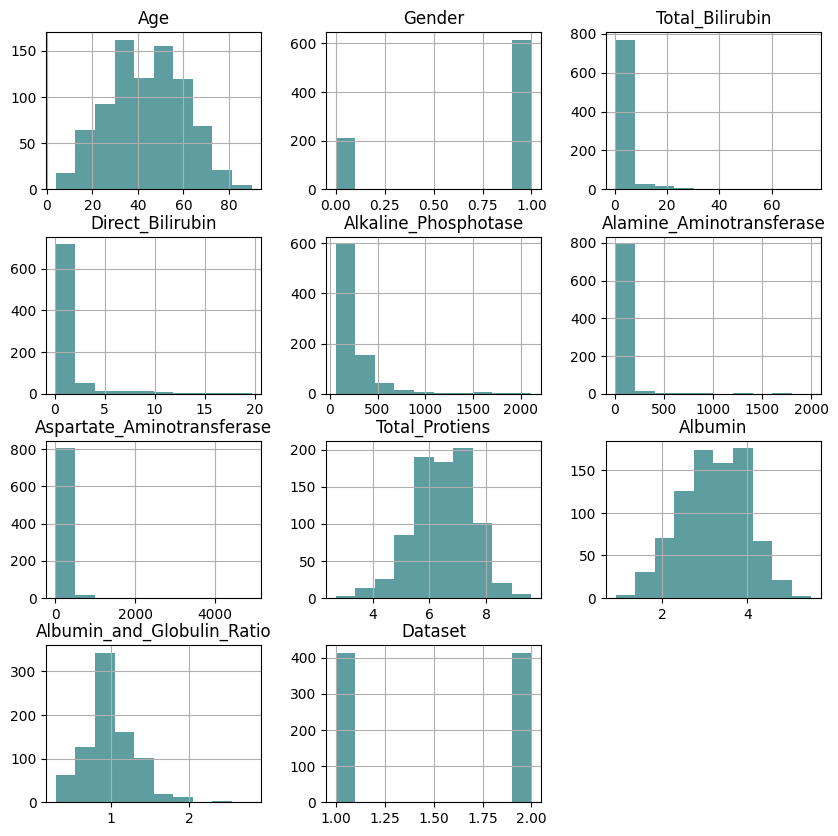

In [65]:
df.hist(figsize = (10,10), color = "#5F9EA0");

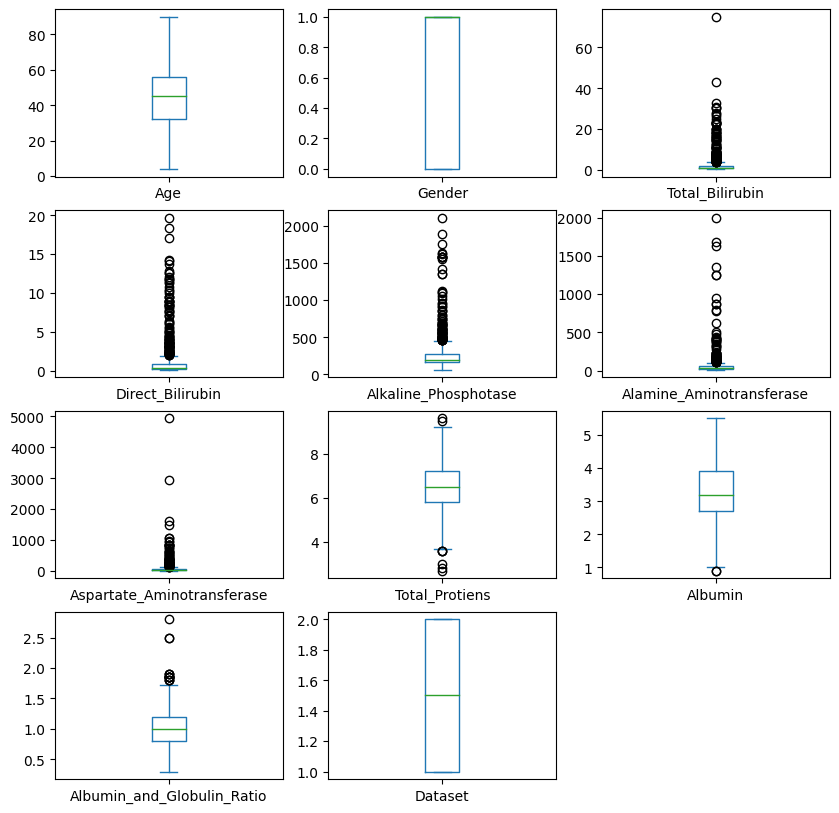

In [66]:
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(10,10));

In [67]:
def Boundary_skew(feature, name):
    
    '''
    We use below method if feature is a skewed
    
    '''

    IQR = feature.quantile(0.75)-feature.quantile(0.25)
    
    lower_bridge=feature.quantile(0.25)-(IQR*1.5)
    upper_bridge=feature.quantile(0.75)+(IQR*1.5)
    
    #### Extreme outliers
#     lower_bridge=df['Insulin'].quantile(0.25)-(IQR*3)
#     upper_bridge=df['Insulin'].quantile(0.75)+(IQR*3)
    
    print(name), print(lower_bridge), print(upper_bridge), print(10*'-')

In [68]:
def Boundary_GD(feature, name):
    '''
    We use below method if follow a Gaussian Distribution
    
    ''' 

#     uppper_boundary=feature.mean() + 3* feature.std()
#     lower_boundary=feature.mean() - 3* feature.std()
    
    uppper_boundary=feature.mean() + feature.std()
    lower_boundary=feature.mean() - feature.std()
    print(name), print(lower_boundary), print(uppper_boundary),print(feature.mean())
    print(10*'-')

In [69]:
Boundary_skew(df.Total_Bilirubin, "Total_Bilirubin")
Boundary_skew(df.Direct_Bilirubin, "Direct_Bilirubin")
Boundary_skew(df.Alkaline_Phosphotase, "Alkaline_Phosphotase")
Boundary_skew(df.Alamine_Aminotransferase, "Alamine_Aminotransferase")
Boundary_skew(df.Aspartate_Aminotransferase, "Aspartate_Aminotransferase")

Total_Bilirubin
-0.9999999999999998
3.8
----------
Direct_Bilirubin
-0.8499999999999999
1.9499999999999997
----------
Alkaline_Phosphotase
1.375
450.375
----------
Alamine_Aminotransferase
-27.5
104.5
----------
Aspartate_Aminotransferase
-47.875
141.125
----------


In [70]:
df.loc[df['Total_Bilirubin']>=3.6,'Total_Bilirubin']=3.6
df.loc[df['Direct_Bilirubin']>=1.76,'Direct_Bilirubin']=1.76
df.loc[df['Alkaline_Phosphotase']>=449,'Alkaline_Phosphotase']=449
df.loc[df['Alamine_Aminotransferase']>=102, 'Alamine_Aminotransferase']=102
df.loc[df['Aspartate_Aminotransferase']>=137, 'Aspartate_Aminotransferase']=137

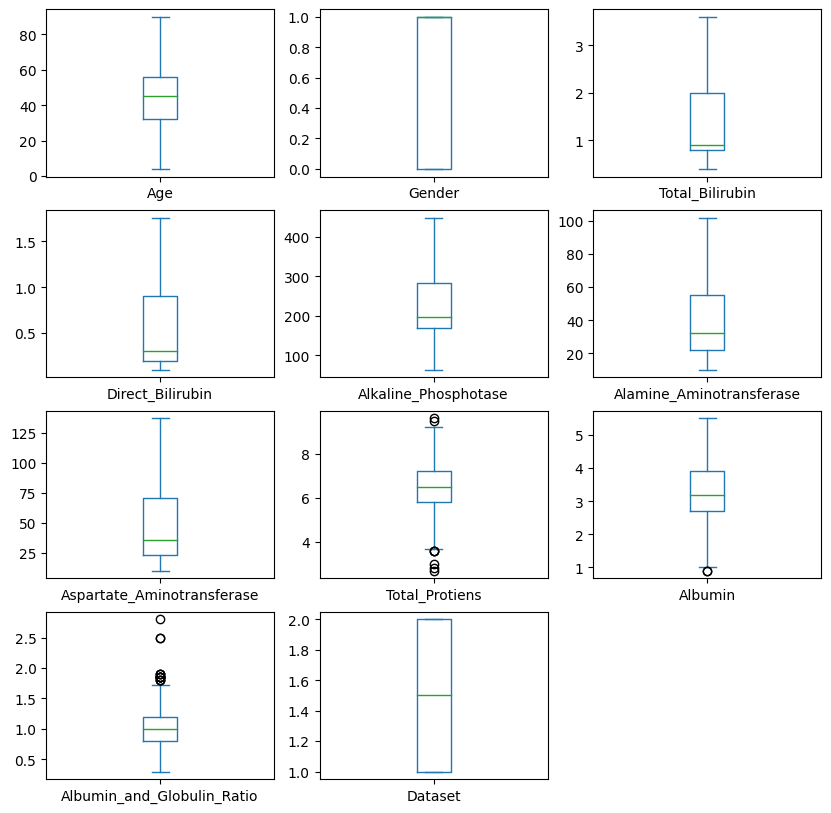

In [71]:
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(10,10));

In [72]:
Boundary_GD(df.Albumin_and_Globulin_Ratio, "Albumin_and_Globulin_Ratio")
Boundary_GD(df.Total_Protiens, 'Total_Protiens')

Albumin_and_Globulin_Ratio
0.6735370927962234
1.2966078347400087
0.9850724637681161
----------
Total_Protiens
5.424330829586423
7.545475933698602
6.484903381642512
----------


In [73]:
df.loc[df['Albumin_and_Globulin_Ratio']>=1.29, 'Albumin_and_Globulin_Ratio']=1.29
df.loc[df['Albumin_and_Globulin_Ratio']<=0.67, 'Albumin_and_Globulin_Ratio']=0.67

df.loc[df['Total_Protiens']>=5.5, 'Total_Protiens']=5.5
df.loc[df['Total_Protiens']<=7.6, 'Total_Protiens']=7.6

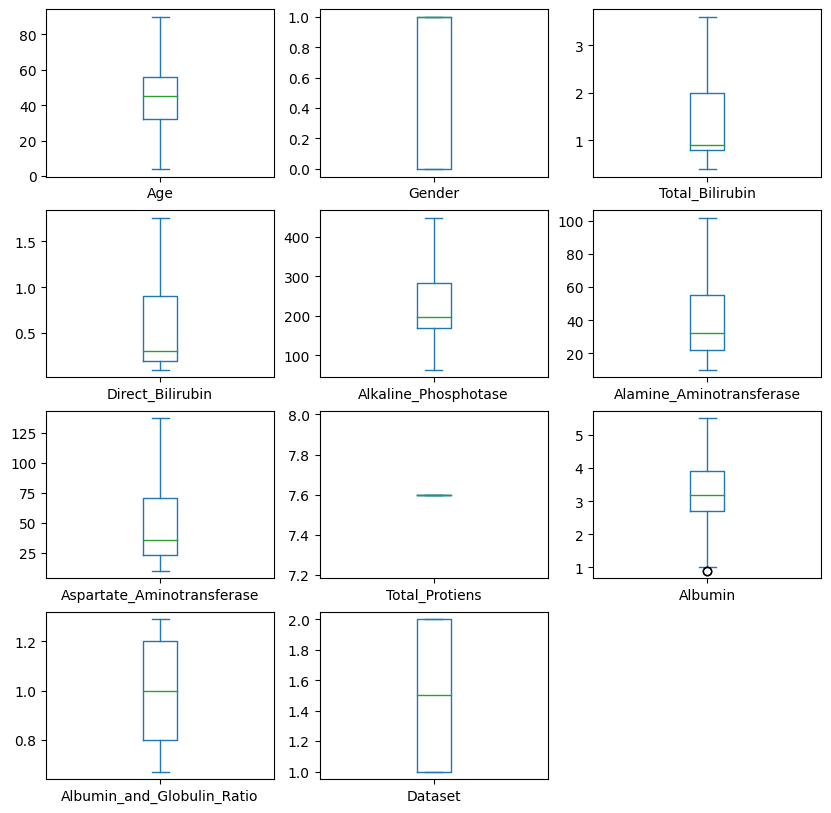

In [74]:
df.plot(kind='box', subplots=True, layout=(4,3), sharex=False,sharey=False ,figsize =(10,10));

In [75]:
X = df.drop(['Dataset'], axis=1)
y = df['Dataset']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
X_train.shape

(662, 10)

In [78]:
def model_with_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [79]:
models = {"RandomForest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression()}

model_scores = model_with_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores 

c:\Users\Vinay\Documents\Physician.Ai\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForest': 0.8253012048192772,
 'KNN': 0.7168674698795181,
 'SVC': 0.6566265060240963,
 'LogisticRegression': 0.6686746987951807}

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

np.random.seed(42)

# Define a grid of hyperparameters
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

cv=KFold(n_splits=5,random_state=None,shuffle=False)

rs_RFC = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                param_distributions=grid,
                                cv=cv,
                                n_iter=5,
                                verbose=True)

rs_RFC.fit(X_train, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [81]:
rs_RFC.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [82]:
model = RandomForestClassifier(n_estimators=200,
                               min_samples_split=4,
                               min_samples_leaf=1,
                               max_depth=10
                              )
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [83]:
y_pred = model.predict(X_test)

### Accuracy

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'Accuracy-Score: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy-Score: 0.81
              precision    recall  f1-score   support

           1       0.98      0.64      0.77        83
           2       0.73      0.99      0.84        83

    accuracy                           0.81       166
   macro avg       0.86      0.81      0.81       166
weighted avg       0.86      0.81      0.81       166



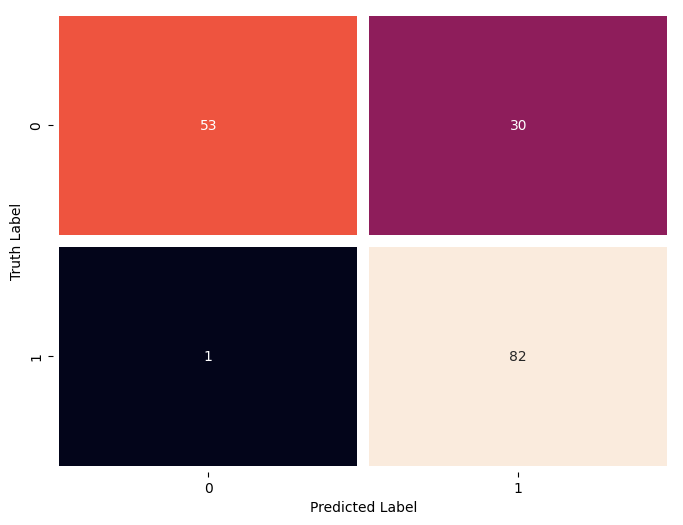

In [85]:
import seaborn as sns
c_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c_m, annot=True, linewidths=8.5 , fmt= '', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [86]:
import joblib
joblib.dump(model, 'liver_model.pkl')

['liver_model.pkl']